<a href="https://colab.research.google.com/github/dwjuston/NLP/blob/main/Copy_of_Homework_2_ReferenceImpl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mth9796: Homework 2


In [ ]:
from collections import Counter, defaultdict
import string
from typing import List, Set, Sequence

import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import pandas as pd
import wordcloud

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Acquire news corpus

In [ ]:
# Kluge to get around a bug in Colab's version of NLTK.
from pathlib import Path
if not Path('/root/nltk_data/corpora/reuters').exists():
  nltk.download('reuters')
  !unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora/

In [ ]:
from nltk.corpus import reuters

In [ ]:
files = reuters.fileids()
print(len(files))
doc0 = next(map(reuters.raw, files[:10]))

10788


In [ ]:
txt = doc0

In [ ]:
txt

'ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia\'s exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.\n      They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      But some exporters said that while the conflict would hurt\n  them in the long-run, in the short-term Tokyo\'s loss might be\n  their gain.\n      The U.S. Has said it will impose 300 mln dlrs of tariffs on\n  imports of Japanese electronics goods on April 17, in\n  retaliation for Japan\'s alleged failure to stick to a pact not\n  to sell semiconductors on world markets at below cost.\n      Unofficial Japanese estimates put the impact of the tariffs\n  at 10 billion dlrs and spokesmen for major electronics firms\n  said they would v

## 2. Tokenizer

In [ ]:
STOPWORDS = set(stopwords.words('english'))
len(STOPWORDS)

179

In [ ]:
lemmatizer.lemmatize("runner")

'runner'

In [ ]:



def tokenize(text: str) -> Sequence[str]:
  """Convert a text(article) into a Sequence of word-tokens.
  
    Considerations:
      * All tokens are emitted as lowercase strings.
      * All tokens are lemmatized.
      * Tokens are removed if they don't meet some miniminum requirements:
          * Length greater than one non-punctuation character;
          * Not a number.
  """
  toks = word_tokenize(text)
  toks = list(map(str.lower, toks))
  toks = list(filter(lambda tok: tok not in STOPWORDS, toks))
  toks = list(map(lemmatizer.lemmatize, toks))
  toks = list(_filter_toks(toks))
  return toks

def _strip_punct(tok: str) -> str:
  """return string with punctuation removed."""
  return ''.join(filter(lambda char: char not in string.punctuation, tok))

def _strip_digits(tok: str) -> str:
  """return string with digits removed."""
  return ''.join(filter(lambda char: char not in string.digits, tok))


def _maybe_a_year(tok: str) -> bool:
  """Return True if tok is likely to be a year."""
  try:
    return 1850 <= int(tok) <= 2200
  except:
    return False


def _is_number(tok: str) -> bool:
  """Return True if tok is a number of some sort."""
  try:
    return isinstance(float(tok), float)
  except:
    return False


def _filter_toks(toks: Sequence[str]) -> Set[str]:
  """Filter a sequence of tokens as per our considerations."""
  toks = filter(lambda tok: len(_strip_digits(_strip_punct(tok))) > 1, toks)
  toks = filter(lambda tok: not _is_number(tok), toks)
  return toks


# Unit-tests:
assert _strip_punct('asd.,qwe,.qwe') =='asdqweqwe'
assert _strip_digits('asd123234qwe') == 'asdqwe'
assert _maybe_a_year('1985'), "1985 is probably a year."
assert _maybe_a_year('123.4') is False, "123.4 is def not a year."
assert _is_number('12'), "12 should be a number."
assert _is_number('12.2'), "12.2 should be a number."
assert _is_number('12a') is False, "12a is not a number."

assert 'a' not in tokenize("asd a sdf")
assert 'a' not in tokenize(doc0), '"a" is too short.'

assert 400 < len(tokenize(doc0)) < 700, "Tokenizer produced a weird number of tokens."

In [ ]:
len(doc0)

4691

In [ ]:
len(tokenize(doc0))

450

In [ ]:
#tokenize(doc0)

In [ ]:
doc0[:100]

'ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Ja'

In [ ]:
tokenize(doc0)[:10]

['asian',
 'exporter',
 'fear',
 'damage',
 'u.s.-japan',
 'rift',
 'mounting',
 'trade',
 'friction',
 'u.s.']

In [ ]:
tokenize(doc0)[:100]

['asian',
 'exporter',
 'fear',
 'damage',
 'u.s.-japan',
 'rift',
 'mounting',
 'trade',
 'friction',
 'u.s.',
 'japan',
 'raised',
 'fear',
 'among',
 'many',
 'asia',
 'exporting',
 'nation',
 'row',
 'could',
 'inflict',
 'far-reaching',
 'economic',
 'damage',
 'businessmen',
 'official',
 'said',
 'told',
 'reuter',
 'correspondent',
 'asian',
 'capital',
 'u.s.',
 'move',
 'japan',
 'might',
 'boost',
 'protectionist',
 'sentiment',
 'u.s.',
 'lead',
 'curb',
 'american',
 'import',
 'product',
 'exporter',
 'said',
 'conflict',
 'would',
 'hurt',
 'long-run',
 'short-term',
 'tokyo',
 'loss',
 'might',
 'gain',
 'u.s.',
 'said',
 'impose',
 'mln',
 'dlrs',
 'tariff',
 'import',
 'japanese',
 'electronics',
 'good',
 'april',
 'retaliation',
 'japan',
 'alleged',
 'failure',
 'stick',
 'pact',
 'sell',
 'semiconductor',
 'world',
 'market',
 'cost',
 'unofficial',
 'japanese',
 'estimate',
 'put',
 'impact',
 'tariff',
 'billion',
 'dlrs',
 'spokesman',
 'major',
 'electronics',

## 3. Compute TF-IDF

In [ ]:
NFILES=1000
fnames = files[:NFILES]

### Term Document Matrix

In [ ]:
raw_tf_mat = pd.DataFrame(map(lambda fname: Counter(tokenize(reuters.raw(fname))), fnames), index=fnames).fillna(0)
raw_tf_mat.shape

(1000, 8283)

In [ ]:
raw_tf_mat.iloc[:20,:20]

,asian,exporter,fear,damage,u.s.-japan,rift,mounting,trade,friction,u.s.,japan,raised,among,many,asia,exporting,nation,row,could,inflict
test/14826,2.0,3.0,2.0,2.0,1.0,1.0,1.0,15.0,1.0,13.0,12.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
test/14828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
test/14839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
test/14840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
raw_tf_mat.head()


,asian,exporter,fear,damage,u.s.-japan,rift,mounting,trade,friction,u.s.,...,crnr.o,uncollectible,receivables,recoverable,capitalized,empire,empa.to,sobeys,sysa.to,elect
test/14826,2.0,3.0,2.0,2.0,1.0,1.0,1.0,15.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Remove terms only appearing in single doc

In [ ]:
_doc_word_id = raw_tf_mat.applymap(lambda x: 1 if x > 0 else 0)

In [ ]:
ndocs_w_word = _doc_word_id.sum()
rare_words = ndocs_w_word[ndocs_w_word < 2].index
len(rare_words)

4305

In [ ]:
raw_tf_mat.columns ^ rare_words

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  """Entry point for launching an IPython kernel.


Index([''ll', ''re', ''ve', '10-year', '15-member', '16th', '180-day', '1st',
       '1st-qtr', '2-for-1',
       ...
       'york', 'yugoslavia', 'zambia', 'zambian', 'zayre', 'zealand', 'zero',
       'zinc', 'zone', 'zurich'],
      dtype='object', length=3978)

In [ ]:
tf_mat = raw_tf_mat[raw_tf_mat.columns ^ rare_words]
tf_mat.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead
  """Entry point for launching an IPython kernel.


(1000, 3978)

In [ ]:
tf_mat.iloc[:20,2100:2120]

,luxembourg,lynch,lyng,macandrews,machine,machinery,made,main,mainly,maintain,maintained,maintaining,maintenance,maize,major,majority,make,maker,making,makoto
test/14826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
test/14828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
test/14839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14840,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
test/14841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14843,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Calc IDF

In [ ]:
ndocs_w_word = tf_mat.applymap(lambda x: 1 if x > 0 else 0).sum()
idf = -np.log10(ndocs_w_word/NFILES)
idf.sort_values()

said           0.222573
lt             0.264401
mln            0.341035
dlrs           0.432974
year           0.507240
                 ...   
remedial       2.698970
remarkable     2.698970
filipino       2.698970
foreseeable    2.698970
'll            2.698970
Length: 3978, dtype: float64

In [ ]:
tf = np.log10(tf_mat+1)

In [ ]:
tfidf = tf*idf
tfidf.head()

,'ll,'re,'ve,10-year,15-member,16th,180-day,1st,1st-qtr,2-for-1,...,york,yugoslavia,zambia,zambian,zayre,zealand,zero,zinc,zone,zurich
test/14826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf.shape

(1000, 3978)

### Compare Wordclouds

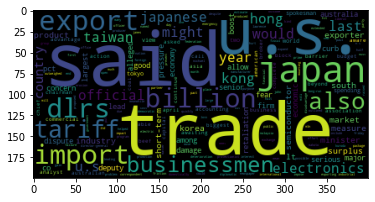

In [ ]:
wc_tf = wordcloud.WordCloud().generate_from_frequencies(tf.iloc[0])
plt.imshow(wc_tf)

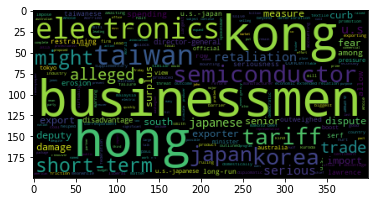

In [ ]:
wc_tfidf = wordcloud.WordCloud().generate_from_frequencies(tfidf.iloc[0])
plt.imshow(wc_tfidf)

In [ ]:
tfidf.head()

,'ll,'re,'ve,10-year,15-member,16th,180-day,1st,1st-qtr,2-for-1,...,york,yugoslavia,zambia,zambian,zayre,zealand,zero,zinc,zone,zurich
test/14826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
test/14833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4. Cluster Articles

In [ ]:
import nltk.cluster.kmeans as kmeans
from nltk.cluster import cosine_distance

In [ ]:
cler = kmeans.KMeansClusterer(
    num_means=4,
    distance=cosine_distance, 
    repeats=10,  # attempt to make clusterer more stable.
    conv_test=1e-9, # attempt to make clusterer more stable.
    avoid_empty_clusters=True  # attempt to avoid clusterer assertion fails.
  )

In [ ]:
ans = cler.cluster(tfidf.values)

/usr/local/lib/python3.7/dist-packages/nltk/cluster/util.py:133: RuntimeWarning: invalid value encountered in double_scalars
  sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


KeyboardInterrupt: ignored

In [ ]:
cler.cluster_names()

In [ ]:
from collections import defaultdict

In [ ]:
cmap = defaultdict(list)
for i in range(len(tfidf)):
  cluster_id = cler.classify_vectorspace(tfidf.iloc[i].values)
  cmap[cluster_id].append(tfidf.index[i])

In [ ]:
cmap[0][:10]

In [ ]:
pd.Series({key : len(val) for key,val in cmap.items()}).sort_values()

In [ ]:
def wc_for_cluster(cluster_id):
  c_fnames = cmap[cluster_id]
  c_tfidf = tfidf.loc[c_fnames]
  print(f"Cluster {cluster_id} = {len(c_fnames)} articles.")
  wc = wordcloud.WordCloud().generate_from_frequencies(c_tfidf.sum())
  plt.imshow(wc)

def top_keywords_for_cluster(cluster_id):
  c_fnames = cmap[cluster_id]
  c_tfidf = tfidf.loc[c_fnames]
  return list(reversed(c_tfidf.sum().sort_values()[-10:].index.values))
  # print(f"Cluster {cluster_id} = {len(c_fnames)} articles.")
  # wc = wordcloud.WordCloud().generate_from_frequencies(c_tfidf.sum())
  # plt.imshow(wc)


def print_headlines_for_cluster(cluster_id):
  for fname in cmap[cluster_id]:
    raw = reuters.raw(fname)
    print(len(raw), raw.splitlines()[0])
    print()


In [ ]:
top_keywords_for_cluster(3)

In [ ]:
def write_cluster_png(cluster_id):
  c_fnames = cmap[cluster_id]
  c_tfidf = tfidf.loc[c_fnames]
  print(f"Cluster {cluster_id} = {len(c_fnames)} articles.")
  wc = wordcloud.WordCloud().generate_from_frequencies(c_tfidf.sum())
  fname = f'cluster-{cluster_id}.png'
  wc.to_file(fname)
  return fname

def headlines(cluster_id):
  return [ raw.splitlines()[0] for raw in map(reuters.raw, cmap[cluster_id])]


# Visualization


In [ ]:
import ipywidgets

def cluster_title(cid):
  return f"Cluster {cid}: {topic(cid)}"

# This is a hack to deal with the fact that cluster order changes between runs.
term_to_topic = {
 'rate'       : 'Interest Rates',
 'trade'      : 'Global Trade',
 'wheat'      : 'Commodities',
#  'dlrs'     : 'Earnings',
 'acquisition': 'Mergers & Aquisitions',
 'ct'         : 'Dividends'
 }

def topic(cid):
  terms = top_keywords_for_cluster(cid)
  for term, topic in term_to_topic.items():
    if term in terms:
      return topic


ipywidgets.VBox([
  ipywidgets.VBox([
    ipywidgets.HTML(f"<h2>{cluster_title(cid)}</h2>"),
    ipywidgets.Dropdown(options=top_keywords_for_cluster(cid)),
    ipywidgets.Dropdown(options=headlines(cid)),
    ipywidgets.Image(value=open(write_cluster_png(cid),'rb').read()),
  ])
  for cid in sorted(cmap.keys())
])
